In [33]:
import cv2 as cv
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(463, 485)


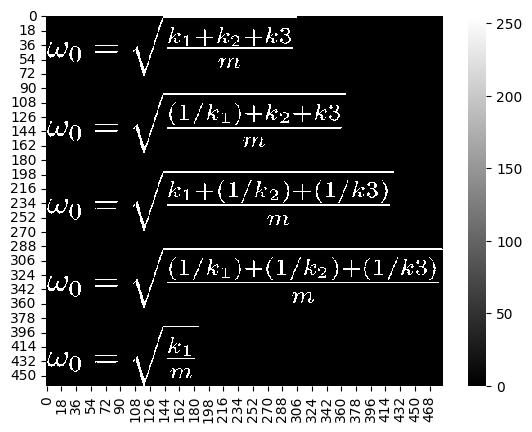

In [34]:
# Load the image
image_path = "output/extracted_question-2.jpg"
img = cv2.imread(image_path)

# Inverse binary threshold grayscale version of image
img_thr = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 128, 255, cv2.THRESH_BINARY_INV)[1]
print(img_thr.shape)

sns.heatmap(img_thr, cmap="gray")
plt.show()

# Count pixels along the y-axis, find peaks
thr_y = 200
y_sum = np.count_nonzero(img_thr, axis=0)
peaks = np.where(y_sum > thr_y)[0]

# Clean peaks
thr_x = 50
temp = np.diff(peaks).squeeze()
idx = np.where(temp > thr_x)[0]
peaks = np.concatenate(([0], peaks[idx+1]), axis=0) + 1

# Save sub-images
for i in np.arange(peaks.shape[0] - 1):
    cv2.imwrite('sub_image_' + str(i) + '.png', img[:, peaks[i]:peaks[i+1]])

In [35]:
for a in np.array([[1, 2, 3], [4, 5, 6]]):
    print(a)

[1 2 3]
[4 5 6]


In [36]:
def getWhiteIntervals(img):
    # Convert to grayscale
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply a binary threshold to detect non-white regions
    _, img_thr = cv.threshold(img, 240, 255, cv.THRESH_BINARY_INV)

    intervals = []

    start = None
    end = None

    for c, line in enumerate(img_thr):

        if start is None:
            if np.sum(line) == 0:
                    start = c
        elif end is None:
            if np.sum(line) != 0:
                end = c-1
                intervals.append([start, end])
                start = None
                end = None

    return intervals

def trimWhitespace(image, output_path="trimmed_output.jpg"):

    # Convert to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Apply a binary threshold to detect non-white regions
    _, thresh = cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)

    # Find contours of the non-white regions
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    if contours:
        # Get bounding box of the largest contour
        x, y, w, h = cv.boundingRect(np.concatenate(contours))

        # Crop the image using the bounding box
        cropped = image[y:y+h, x:x+w]

        # Save or return the cropped image
        cv.imwrite(output_path, cropped)
        return cropped

def splitLines(img):
    needle_height = img.shape[0]
    needle_width = img.shape[1]
    
    intervals = getWhiteIntervals(img)
    intervals.insert(0, [-1, 0])
    intervals.append([needle_height, -1])

    quest_intervals = [[intervals[inter][1], intervals[inter+1][0]] for inter in range(len(intervals)-1)]

    splitted_img = []

    for inter in quest_intervals:
        img_ = img[inter[0]:inter[1], 0:needle_width]
        img_ = trimWhitespace(img_)
        splitted_img.append(img_)

    return splitted_img


In [37]:
image_path = "output/extracted_question-2.jpg"
img = cv2.imread(image_path, cv.IMREAD_COLOR)

intervals = getWhiteIntervals(img)

In [38]:
intervals = getWhiteIntervals(img)
intervals.insert(0, [-1, 0])
intervals.append([0, -1])
display(intervals)

intervals = [[intervals[inter][1], intervals[inter+1][0]] for inter in range(len(intervals)-1)]
intervals

[[-1, 0], [75, 96], [172, 193], [269, 290], [366, 387], [0, -1]]

[[0, 75], [96, 172], [193, 269], [290, 366], [387, 0]]

In [39]:
imgs = splitLines(img)

for c, img in enumerate(imgs):
    # sns.heatmap(cv.cvtColor(img, cv.COLOR_BGR2GRAY), cmap="gray")
    # plt.show()
    cv.imwrite(f"file-{c}.jpg", img)

In [40]:
needle_height = img.shape[0]
needle_width = img.shape[1]

sns.heatmap(cv.cvtColor(img[0:intervals[0][0], 0:needle_width], cv.COLOR_BGR2GRAY))

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
